# Cement Strength Prediction
- Regression Problem where we need to predict the strength of cement

# Data description:-
- Cement (component 1) quantitative kg in a m3 mixture Input Variable.

- Blast Furnace Slag (component 2) quantitative kg in a m3 mixture Input Variable-- Blast furnace slag is a nonmetallic coproduct produced in the process. It consists primarily of silicates, aluminosilicates, and calcium-alumina-silicates.

- Fly Ash (component 3) quantitative kg in a m3 mixture Input Variable- it is a coal combustion product that is composed of the particulates (fine particles of burned fuel) that are driven out of coal-fired boilers together with the flue gases. 

- Water (component 4) quantitative kg in a m3 mixture.

- Superplasticizer (component 5) quantitative kg in a m3 mixture Input Variable--Superplasticizers (SP's), also known as high range water reducers, are additives used in making high strength concrete. Their addition to concrete or mortar allows the reduction of the water to cement ratio without negatively affecting the workability of the mixture, and enables the production of self-consolidating concrete and high performance concrete.

- Coarse Aggregate (component 6) quantitative kg in a m3 mixture Input Variable-- construction aggregate, or simply "aggregate", is a broad category of coarse to medium grained particulate material used in construction, including sand, gravel, crushed stone, slag, recycled concrete and geosynthetic aggregates.

- Fine Aggregate (component 7) quantitative kg in a m3 mixture	Input Variable—Similar to coarse aggregate, the constitution is much finer.

- Age	quantitative Day (1~365) Input Variable.

- Concrete compressive strength	quantitative MPa Output Variable.

In [1]:
#Importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing VIF to check the multicollineraty
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Importing traintest split to split into traning and testing data
from sklearn.model_selection import train_test_split

#Importing Linear Regression and Lasso
from sklearn.linear_model import LinearRegression, Lasso

#Importing Random forest
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor 

#Importing K nereast neighbour
from sklearn.neighbors import KNeighborsRegressor

#Importing XGBoost
from xgboost import XGBRegressor

In [2]:
#Importing dataset
df = pd.read_excel("Concrete_Data.xls")

In [3]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [6]:
#Checking if any null values present
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

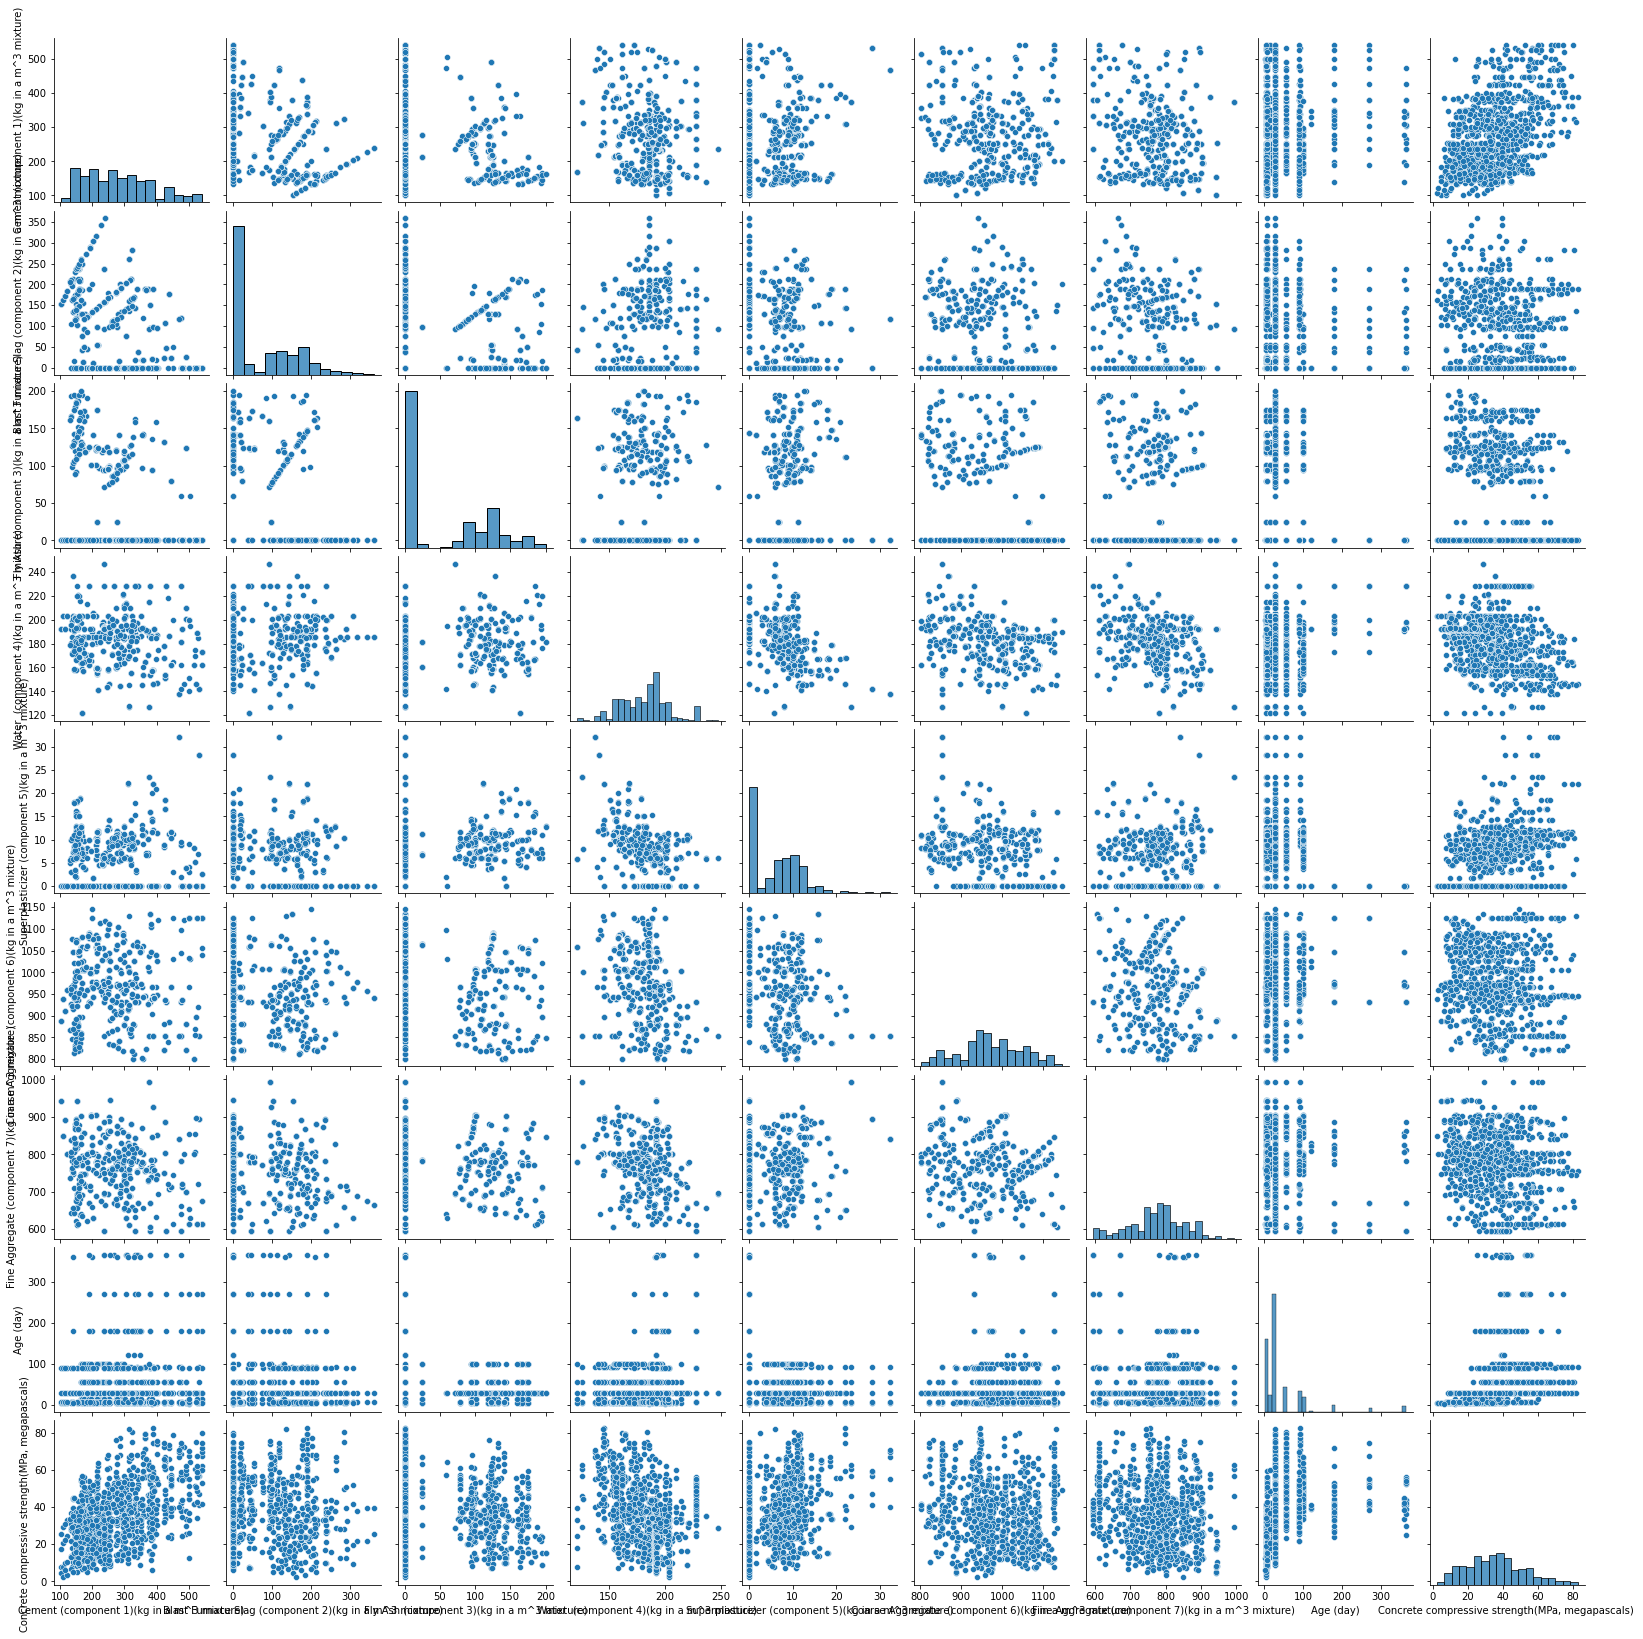

In [7]:
#Pairplot 
sns.pairplot(df)

In [8]:
#Checking the skewness of the data
df.skew()

Cement (component 1)(kg in a m^3 mixture)                0.509517
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.800737
Fly Ash (component 3)(kg in a m^3 mixture)               0.537445
Water  (component 4)(kg in a m^3 mixture)                0.074324
Superplasticizer (component 5)(kg in a m^3 mixture)      0.908113
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.040206
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.252979
Age (day)                                                3.269177
Concrete compressive strength(MPa, megapascals)          0.416922
dtype: float64

<AxesSubplot:>

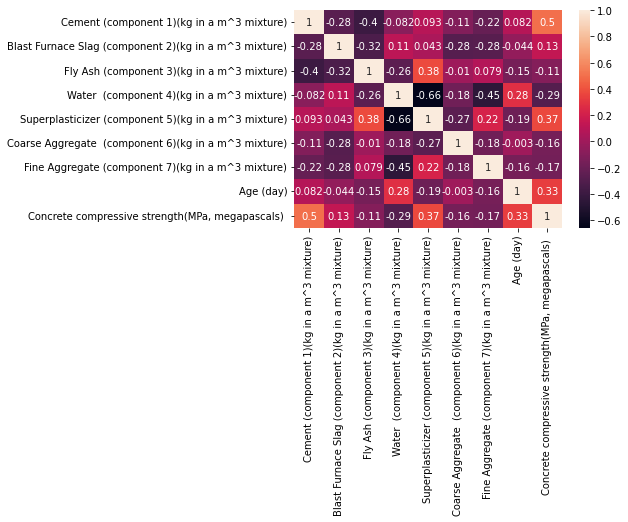

In [9]:
#Checking tyhe correlation
sns.heatmap(df.corr(), annot=True)

In [10]:
#Spliting into Independent and dependent variable
X = df.iloc[:,:8] #Independent
y = df.iloc[:, 8] #Dependent

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

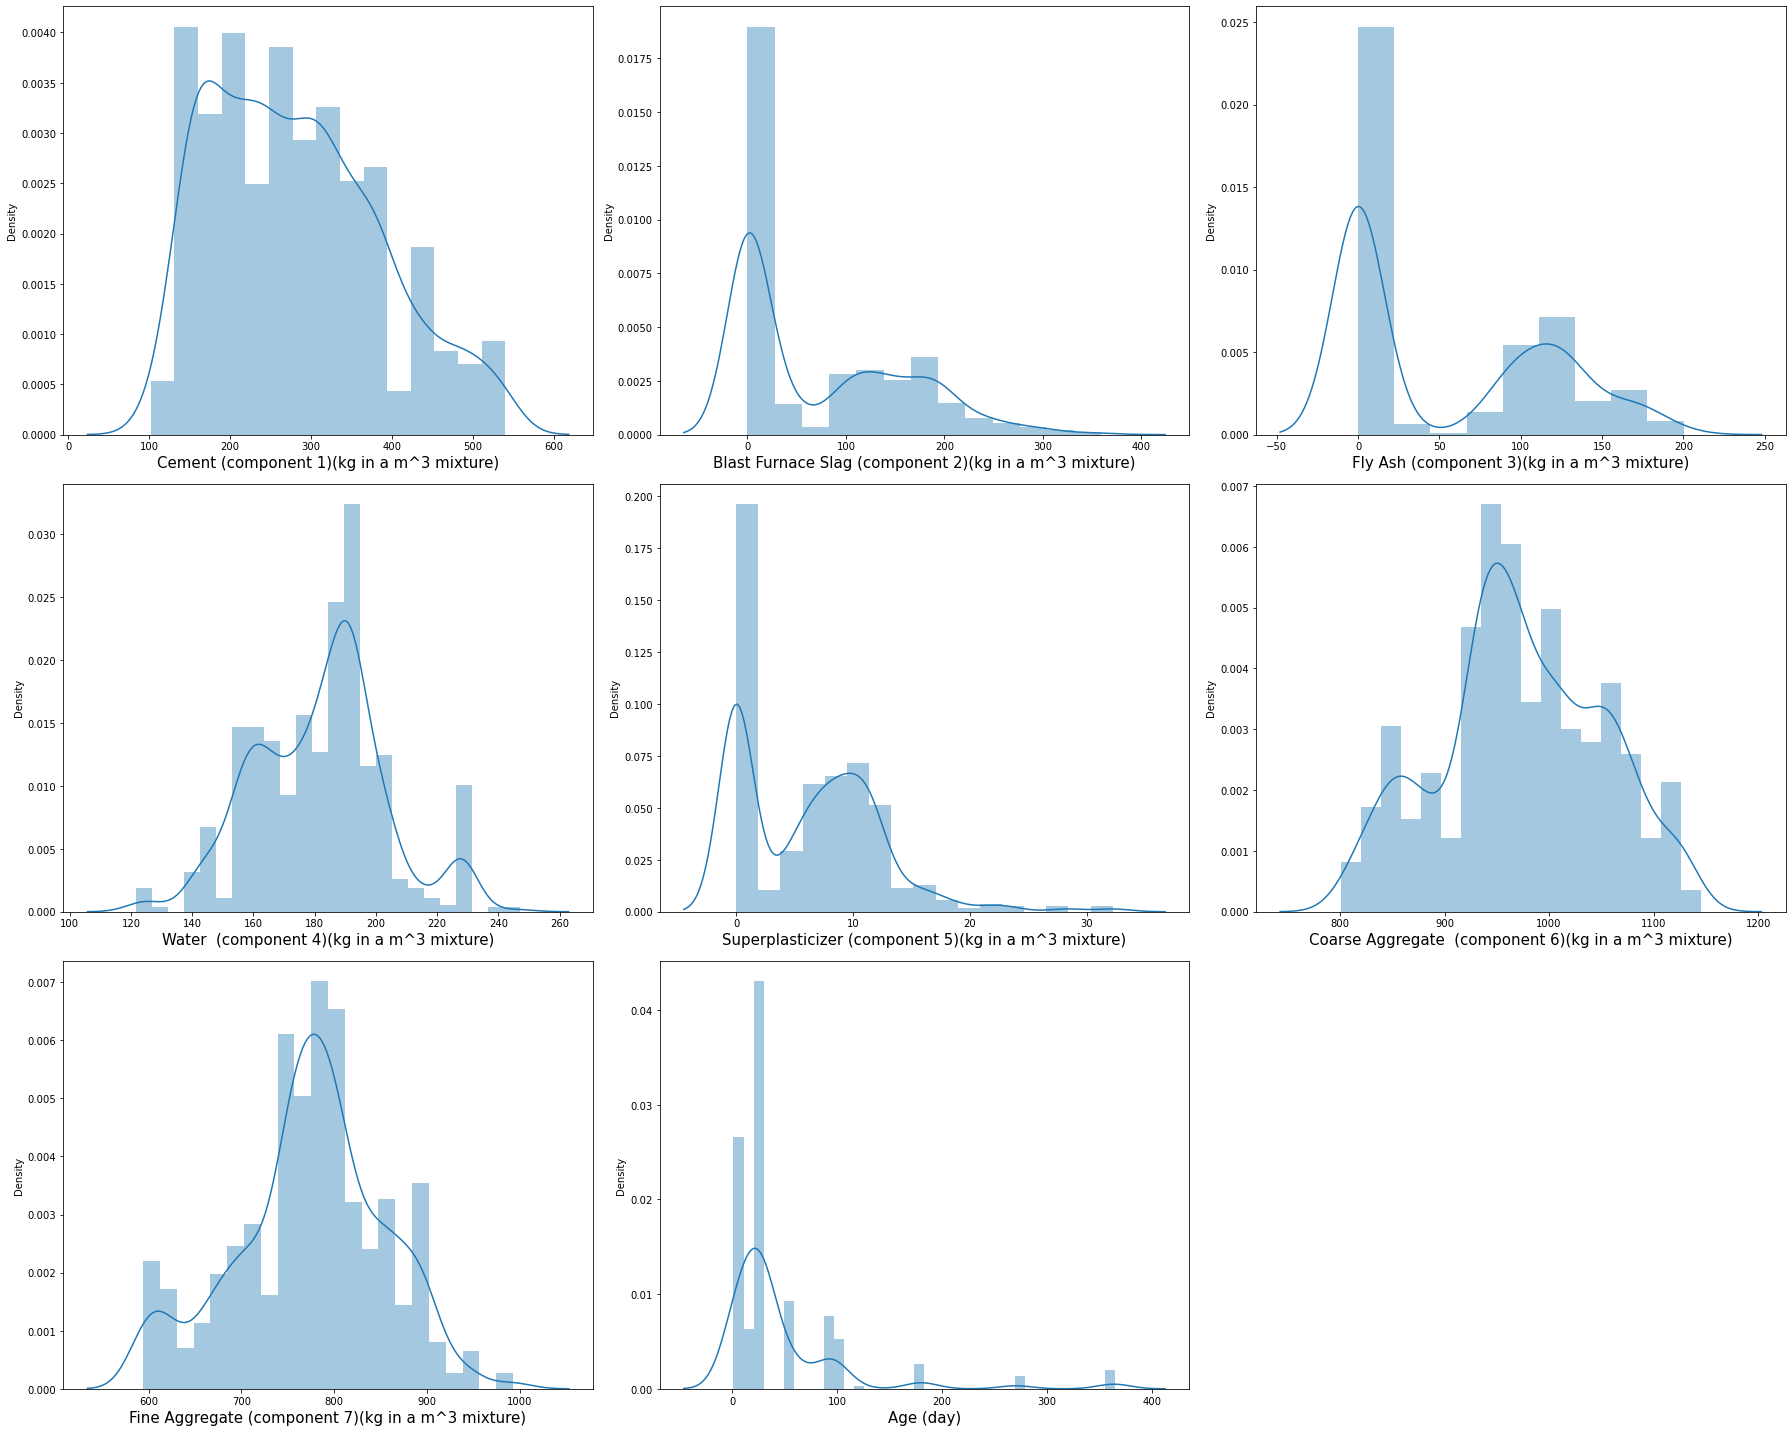

In [11]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [12]:
# before doing the log transformation, 
#let's add 1 to each value in everycolumn so that we don't get exception while calculationg the log for value 0

for column in X.columns:
    X[column]+=1
    X[column] = np.log(X[column])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

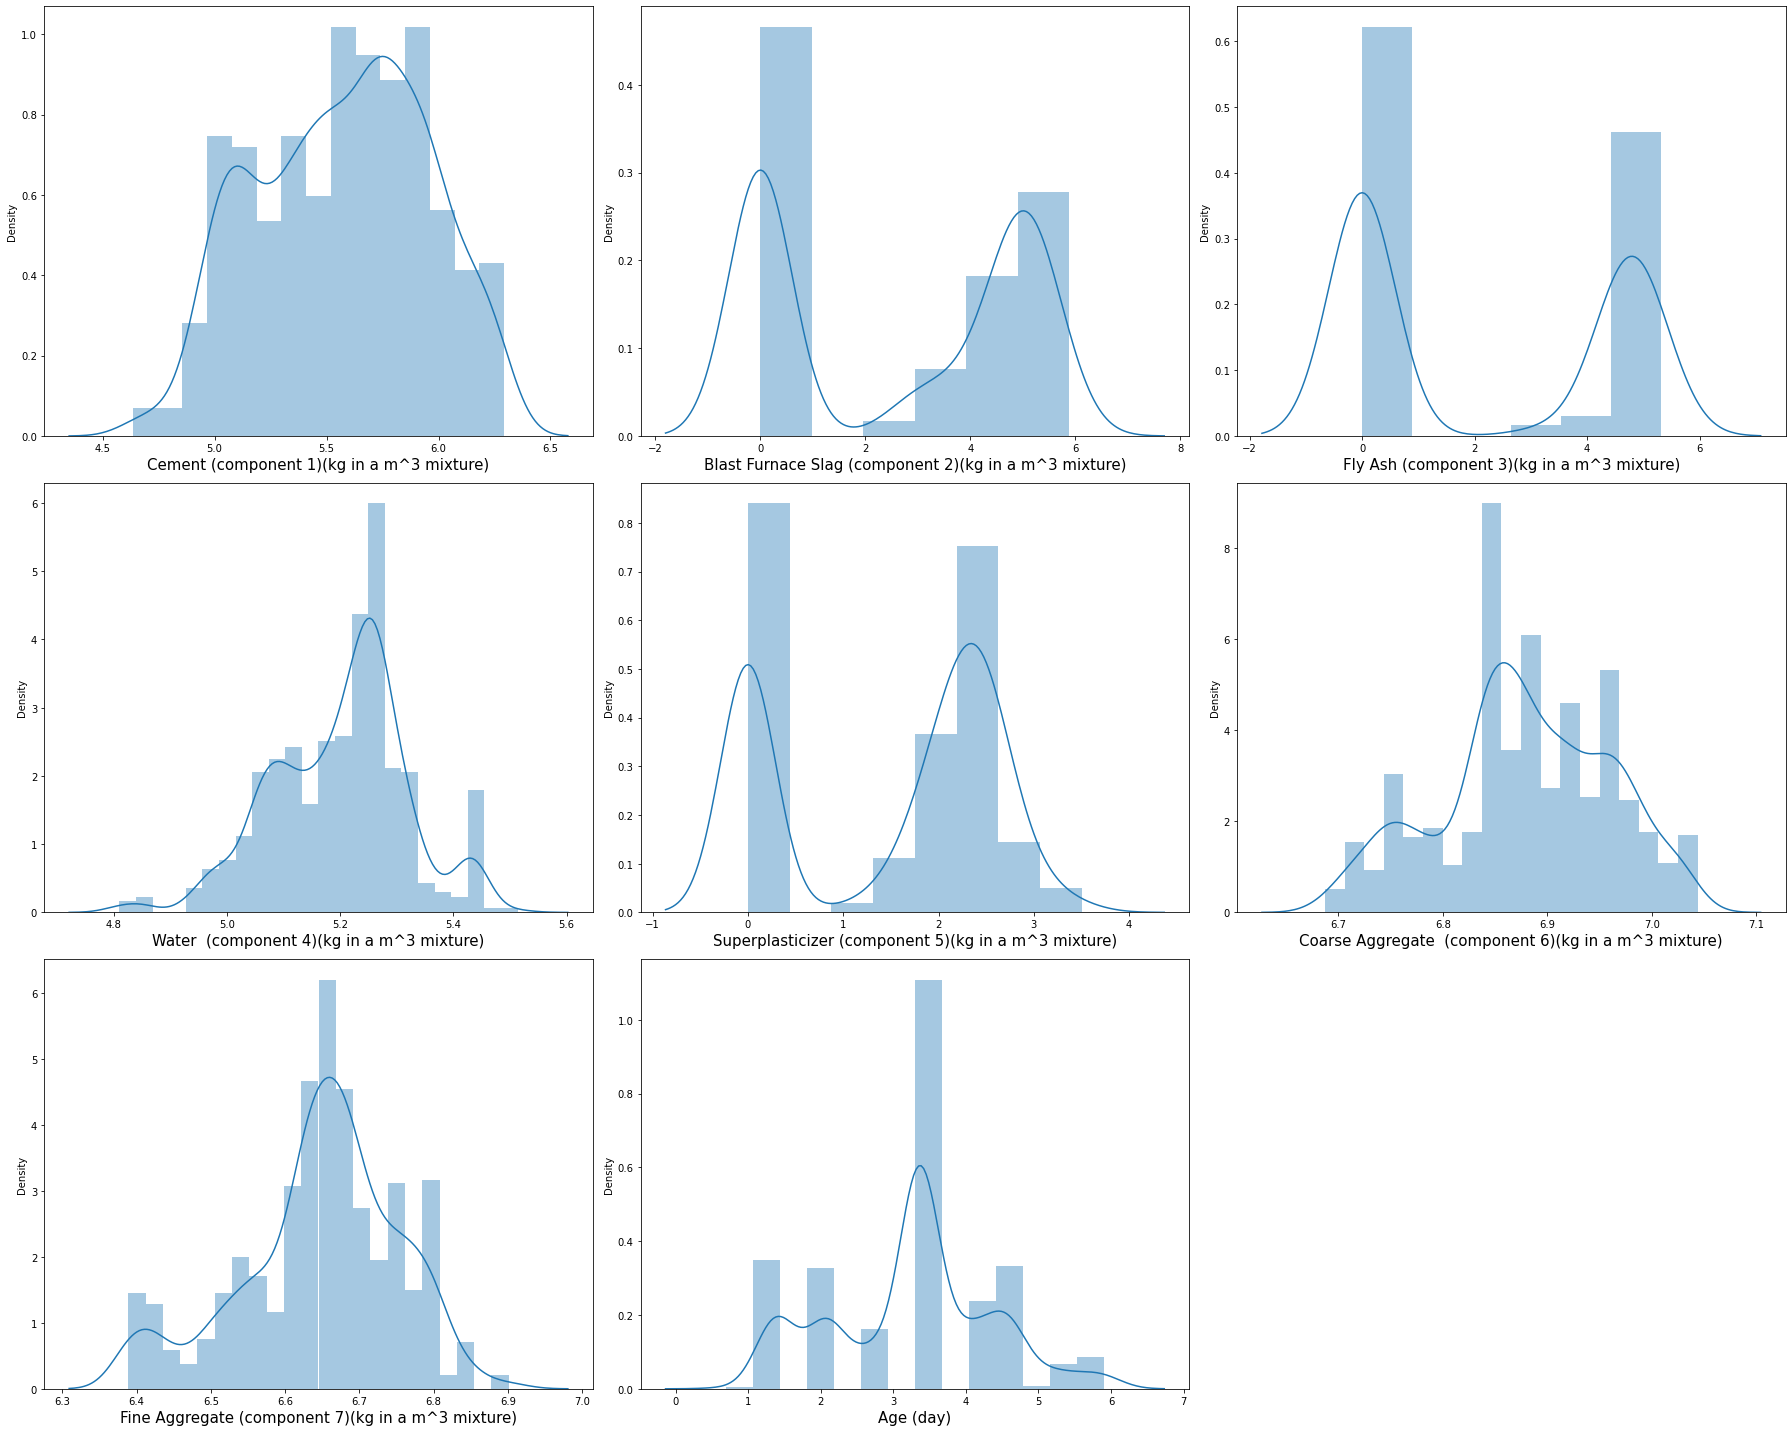

In [13]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [14]:
#Multicollinearity
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"] = X.columns

In [15]:
vif

,VIF,Features
0,314.385355,Cement (component 1)(kg in a m^3 mixture)
1,3.453350,Blast Furnace Slag (component 2)(kg in a m^3 m...
2,4.945644,Fly Ash (component 3)(kg in a m^3 mixture)
3,2115.697213,Water (component 4)(kg in a m^3 mixture)
4,8.176823,Superplasticizer (component 5)(kg in a m^3 mix...
5,3487.583249,Coarse Aggregate (component 6)(kg in a m^3 mi...
6,2694.387221,Fine Aggregate (component 7)(kg in a m^3 mixture)
7,9.870443,Age (day)


In [16]:
#Splitiing into traning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(824, 8)
(206, 8)
(206,)
(824,)


# Models

# Linear Regression


In [18]:
#Creating Linear Resgression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
lr.score(X_test, y_test)

0.8108769171692618

In [20]:
lr.score(X_train, y_train)

0.800397280123629

# Lasso

In [21]:
#Creating Lasso model
l = Lasso()
l.fit(X_train, y_train)

Lasso()

In [22]:
l.score(X_test, y_test)

0.7228876589763804

# RandomForestRegressor 

In [23]:
#Creating Random forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
rf.score(X_test, y_test)

0.8785045939251909

In [25]:
rf.score(X_train, y_train)

0.9865868185405509

# KNN

In [26]:
#Creating KNN model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [27]:
knn.score(X_test, y_test)

0.790636269200056

In [28]:
knn.score(X_train, y_train)

0.88565290278884

# AdaBoost

In [29]:
#Creating Ada Boost model
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [30]:
ada.score(X_train, y_train)

0.8198379766400533

In [31]:
ada.score(X_test, y_test)

0.7509298981932243

# XGBoost

In [32]:
#Creating XGBOOST model
xg = XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [33]:
y_preds = xg.predict(X_test)

In [34]:
xg.score(X_test, y_test)

0.9040085130362573

In [35]:
xg.score(X_train, y_train)

0.9965687900916184

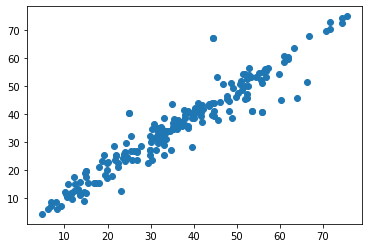

In [36]:
plt.scatter(y_test, y_preds)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Concrete compressive strength(MPa, megapascals) ', ylabel='Density'>

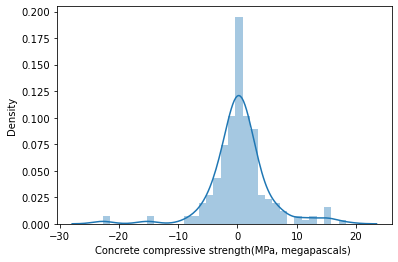

In [37]:
sns.distplot(y_test-y_preds)

In [38]:
scores = pd.DataFrame({"Models" : ["Linear Regression", "Lasso", "KNN", "Random Forest", "Ada Boost", "XG Boost"], 
                      "Train score" : [lr.score(X_train, y_train), l.score(X_train, y_train), knn.score(X_train, y_train), rf.score(X_train, y_train), ada.score(X_train, y_train), xg.score(X_train, y_train)],
                      "Test score" : [lr.score(X_test, y_test), l.score(X_test, y_test), knn.score(X_test, y_test), rf.score(X_test, y_test), ada.score(X_test, y_test), xg.score(X_test, y_test)]})

In [39]:
scores

,Models,Train score,Test score
0,Linear Regression,0.800397,0.810877
1,Lasso,0.734819,0.722888
2,KNN,0.885653,0.790636
3,Random Forest,0.986587,0.878505
4,Ada Boost,0.819838,0.750930
5,XG Boost,0.996569,0.904009


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Test score'>

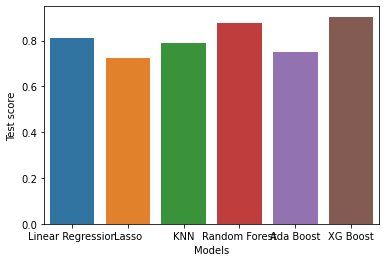

In [40]:
sns.barplot(scores["Models"], scores["Test score"])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Train score'>

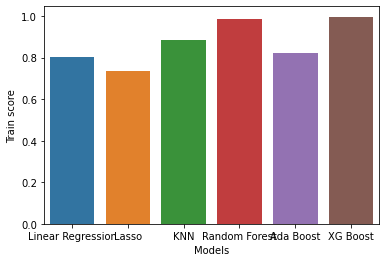

In [41]:
sns.barplot(scores["Models"], scores["Train score"])